## Task 4: **Healthcare Sector Analysis**

Discovering facts from data in healthcare sector

In [1]:
import os
import re
import sys
import json
import nltk
import pandas as pd
import numpy as np
from scipy.stats import norm, ttest_ind
from collections import defaultdict
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
def read_data(root_dir, data_folder, csv_file):
    if data_folder is not None:
        print("\nReading data from " + csv_file)
        file_dir = os.path.join(root_dir, data_folder, csv_file)
        return_df = pd.read_csv(file_dir)
        return return_df
    else:
        print("\nReading data from " + csv_file)
        file_dir = os.path.join(root_dir, csv_file)
        return_df = pd.read_csv(file_dir)
        return return_df

In [4]:
def merge_dataframe(dst_dataframe, new_part):
    no_nan_new_part = new_part.copy().fillna('')
    if dst_dataframe is None:
        dst_dataframe = no_nan_new_part.copy()
        return dst_dataframe
    else:
        dst_dataframe = pd.concat([dst_dataframe, no_nan_new_part])
        return dst_dataframe

In [5]:
'''
Basic environ params
'''
root_dir = "\\".join(os.path.abspath('').split('\\')[:-1])
# root_dir = '/content/drive/My Drive/Penn Inequality Project'
task_folder = "task4"

'''
Main adjustable params
'''
# Section of codes, which are listed in every cell
company_analyzed = False
reference_level_analyzed = False
incumbent_point_analyzed = False
min_surveying_years = 3
min_level_counts = 5
max_level_counts = 20

In [6]:
print("Read csv file from path " + root_dir)
data_df = read_data(root_dir, None, 'reclassified_all_data.csv')

Read csv file from path C:\Users\liubo\OneDrive\Desktop

Reading data from reclassified_all_data.csv


## Company Analysis

### 1. Raw analysis of all companies in healthcare sector

A total of 1471828 data pieces are related with healthcare industry

The mean salary of the healthcare industry is 71625.51832686971



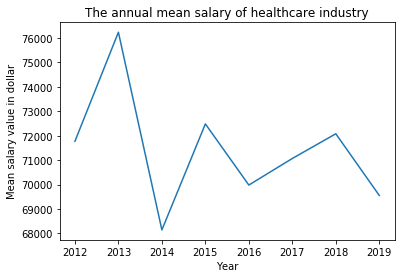


The median salary of the healthcare industry is 68640.0



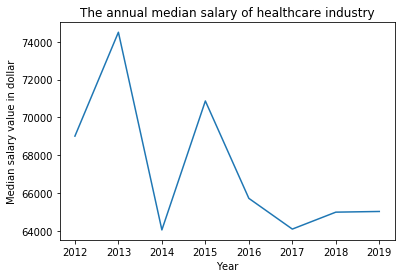


Mean minus Median plot


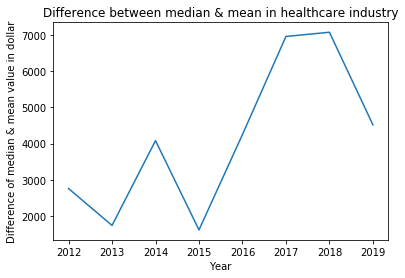

In [7]:
if not company_analyzed:
    # Mean
    data_df = data_df[['KF_ID', 'CalendarYear', 'SectorName', 'Base Salary', 'RegionName', 'OwnershipTypeDesc', 'NumOfEmpDesc', 'ReferenceLevelNum', 'IncumbentPointCount']]
    healthcare_df = data_df[data_df['SectorName']=="healthcare"]
    healthcare_df = healthcare_df[healthcare_df['ReferenceLevelNum'] != 99]
    print("A total of " + str(healthcare_df.shape[0]) + " data pieces are related with healthcare industry\n")
    healthcare_mean_salary = healthcare_df['Base Salary'].mean()
    print("The mean salary of the healthcare industry is " + str(healthcare_mean_salary) + "\n")

    annual_mean = []
    for year in range(2008, 2020):
        year_healthcare_df = healthcare_df[healthcare_df['CalendarYear'] == year]
        annual_mean_salary = year_healthcare_df['Base Salary'].mean()
        annual_mean.append(annual_mean_salary)

    fig1 = plt.figure()
    plt.title("The annual mean salary of healthcare industry")
    plt.ylabel("Mean salary value in dollar")
    plt.xlabel("Year")
    plt.plot(range(2008, 2020), annual_mean)
    plt.show()

    # Median
    healthcare_median_salary = healthcare_df['Base Salary'].median()
    print("\nThe median salary of the healthcare industry is " + str(healthcare_median_salary) + "\n")

    annual_median = []
    for year in range(2008, 2020):
        year_healthcare_df = healthcare_df[healthcare_df['CalendarYear'] == year]
        annual_median_salary = year_healthcare_df['Base Salary'].median()
        annual_median.append(annual_median_salary)

    fig2 = plt.figure()
    plt.title("The annual median salary of healthcare industry")
    plt.ylabel("Median salary value in dollar")
    plt.xlabel("Year")
    plt.plot(range(2008, 2020), annual_median)
    plt.show()

    print("\nMean minus Median plot")
    fig3 = plt.figure()
    plt.title("Difference between median & mean in healthcare industry")
    plt.ylabel("Difference of median & mean value in dollar")
    plt.xlabel("Year")
    plt.plot(range(2008, 2020), np.array(annual_mean) - np.array(annual_median))
    plt.show()

### 2. Analysis on companies

Companies in healthcare industries include: 

[19, 20, 25, 26, 48, 69, 93, 100, 106, 113, 140, 160, 162, 163, 205, 208, 212, 214, 216, 218, 224, 228, 246, 254, 290, 296, 311, 334, 344, 345, 351, 388, 401, 420, 421, 423, 424, 428, 440, 449, 467, 484, 493, 510, 520, 522, 544, 559, 565, 569, 578, 580, 581, 595, 644, 681, 724, 743, 755, 786, 787, 814, 815, 819, 832, 833, 836, 857, 858, 862, 864, 871, 882, 883, 929, 944, 950, 977, 989, 1031, 1033, 1050, 1065, 1069, 1079, 1082, 1097, 1114, 1129, 1147, 1148, 1149, 1150, 1151, 1152, 1162, 1167, 1184, 1190, 1195, 1204, 1213, 1274, 1299, 1300, 1317, 1328, 1377, 1378, 1385, 1406, 1422, 1447, 1450, 1476, 1492, 1503, 1508, 1524, 1528, 1539, 1541, 1542, 1543, 1545, 1546, 1549, 1550, 1558, 1562, 1566, 1567, 1570, 1584, 1598, 1605, 1627, 1645, 1657]

A total of 139 companies

Saving the distribtion of companies across the years from 2008 to 2019 in json file

Of all healthcare companies, counting the number of years included in this survey



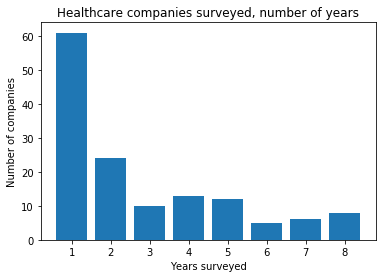


Distribution of companies across the years


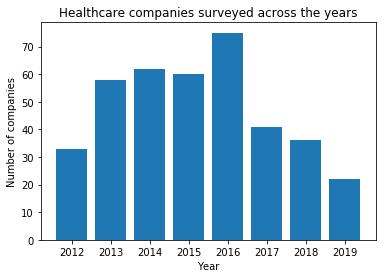


Saving the distribtion of companies across reference levels in json file

Of all healthcare companies, counting the number of reference levels included in this survey



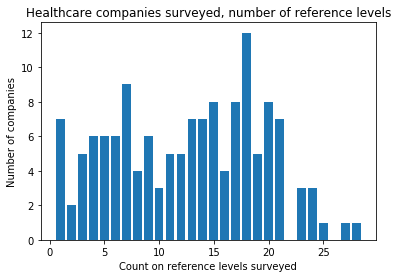


Saving the distribtion of companies across incumbent points in json file

Of all healthcare companies, counting the number of incumbent points included in this survey



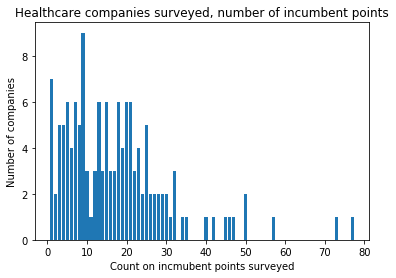

In [8]:
if not company_analyzed:
    print("Companies in healthcare industries include: \n")
    print(sorted(pd.unique(healthcare_df['KF_ID'])))
    print("\nA total of " + str(len(sorted(pd.unique(healthcare_df['KF_ID'])))) + " companies")

    # Year distribution
    company_year_dict = defaultdict(list)
    year_company_dict = defaultdict(list)
    for company in sorted(pd.unique(healthcare_df['KF_ID'])):
        company_healthcare_df = healthcare_df[healthcare_df['KF_ID'] == company]
        for year in range(2008, 2020):
            if company_healthcare_df[company_healthcare_df['CalendarYear'] == year].shape[0] > 0:
                company_year_dict[int(company)].append(year)

    with open(os.path.join(root_dir, "task4", "Healthcare_Companies_Distribution_Across_Years.json"), 'w') as output_file:
        print("\nSaving the distribtion of companies across the years from 2008 to 2019 in json file")
        json.dump(company_year_dict, output_file)
        
    print("\nOf all healthcare companies, counting the number of years included in this survey\n")
    len_distribution = defaultdict(int)
    for company in company_year_dict:
        len_distribution[len(company_year_dict[company])] += 1
    fig1 = plt.figure()
    plt.title("Healthcare companies surveyed, number of years")
    plt.xlabel("Years surveyed")
    plt.ylabel("Number of companies")
    plt.bar(list(len_distribution.keys()), list(len_distribution.values()))
    plt.show()

    print("\nDistribution of companies across the years")
    count_companies = defaultdict(int)
    for year in range(2008, 2020):
        year_healthcare_df = healthcare_df[healthcare_df['CalendarYear'] == year]
        for company in pd.unique(year_healthcare_df['KF_ID']):
            count_companies[year] += 1
    fig2 = plt.figure()
    plt.title("Healthcare companies surveyed across the years")
    plt.xlabel("Year")
    plt.ylabel("Number of companies")
    plt.bar(list(count_companies.keys()), list(count_companies.values()))
    plt.show()

    # Reference level distribution
    company_level_dict = defaultdict(list)
    for company in sorted(pd.unique(healthcare_df['KF_ID'])):
        company_healthcare_df = healthcare_df[healthcare_df['KF_ID'] == company]
        for level in pd.unique(company_healthcare_df['ReferenceLevelNum']):
            company_level_dict[int(company)].append(int(level))    
    with open(os.path.join(root_dir, "task4", "Healthcare_Companies_Distribution_Across_ReferLevel.json"), 'w') as output_file:
        print("\nSaving the distribtion of companies across reference levels in json file")
        json.dump(company_level_dict, output_file)
    
    print("\nOf all healthcare companies, counting the number of reference levels included in this survey\n")
    len_distribution = defaultdict(int)
    for company in company_level_dict:
        len_distribution[len(company_level_dict[company])] += 1
    fig3 = plt.figure()
    plt.title("Healthcare companies surveyed, number of reference levels")
    plt.xlabel("Count on reference levels surveyed")
    plt.ylabel("Number of companies")
    plt.bar(list(len_distribution.keys()), list(len_distribution.values()))
    plt.show()

    # Incumbent point distribution
    company_point_dict = defaultdict(list)
    for company in sorted(pd.unique(healthcare_df['KF_ID'])):
        company_healthcare_df = healthcare_df[healthcare_df['KF_ID'] == company]
        for point in pd.unique(company_healthcare_df['IncumbentPointCount']):
            company_point_dict[int(company)].append(int(level))    
    with open(os.path.join(root_dir, "task4", "Healthcare_Companies_Distribution_Across_IncumbPoint.json"), 'w') as output_file:
        print("\nSaving the distribtion of companies across incumbent points in json file")
        json.dump(company_point_dict, output_file)
    
    print("\nOf all healthcare companies, counting the number of incumbent points included in this survey\n")
    len_distribution = defaultdict(int)
    for company in company_level_dict:
        len_distribution[len(company_point_dict[company])] += 1
    fig3 = plt.figure()
    plt.title("Healthcare companies surveyed, number of incumbent points")
    plt.xlabel("Count on incmubent points surveyed")
    plt.ylabel("Number of companies")
    plt.bar(list(len_distribution.keys()), list(len_distribution.values()))
    plt.show()


### 3. Improved analysis by deleting companies that are only included in the survey for 1-2 years

Of companies over 3 years of survey

A total of 1367124 data pieces are related with healthcare industry


Distribution of companies across the years after improvement



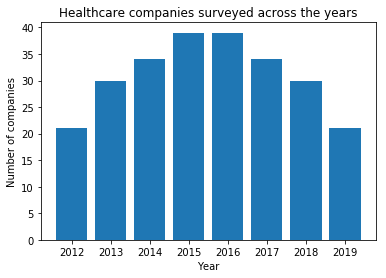

The mean salary of the healthcare industry is 72539.02661719054



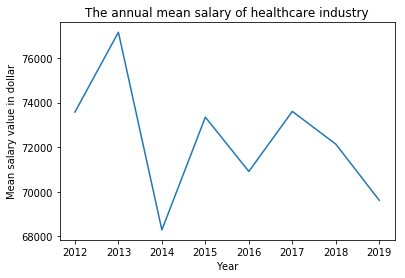


The median salary of the healthcare industry is 69748.0



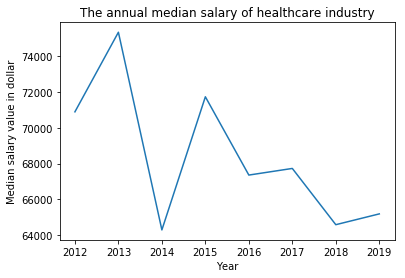


Mean minus Median plot


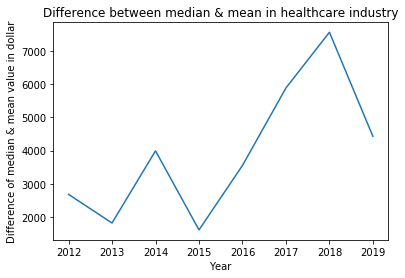

In [9]:
# The following analysis gets rid of companies only taking 1 or 2 years of survey
if not company_analyzed:
    new_healthcare_df = None
    for company in company_year_dict:
        if len(company_year_dict[company]) > min_surveying_years:
            new_healthcare_df = merge_dataframe(new_healthcare_df, healthcare_df[healthcare_df['KF_ID'] == company])


    print("Of companies over " + str(min_surveying_years) + " years of survey\n")
    print("A total of " + str(new_healthcare_df.shape[0]) + " data pieces are related with healthcare industry\n")

    print("\nDistribution of companies across the years after improvement\n")
    count_companies = defaultdict(int)
    for year in range(2008, 2020):
        year_healthcare_df = new_healthcare_df[new_healthcare_df['CalendarYear'] == year]
        for company in pd.unique(year_healthcare_df['KF_ID']):
            count_companies[year] += 1
    fig0 = plt.figure()
    plt.title("Healthcare companies surveyed across the years")
    plt.xlabel("Year")
    plt.ylabel("Number of companies")
    plt.bar(list(count_companies.keys()), list(count_companies.values()))
    plt.show()

    # Mean
    healthcare_mean_salary = new_healthcare_df['Base Salary'].mean()
    print("The mean salary of the healthcare industry is " + str(healthcare_mean_salary) + "\n")

    annual_mean = []
    for year in range(2008, 2020):
        year_healthcare_df = new_healthcare_df[new_healthcare_df['CalendarYear'] == year]
        annual_mean_salary = year_healthcare_df['Base Salary'].mean()
        annual_mean.append(annual_mean_salary)

    fig1 = plt.figure()
    plt.title("The annual mean salary of healthcare industry")
    plt.ylabel("Mean salary value in dollar")
    plt.xlabel("Year")
    plt.plot(range(2008, 2020), annual_mean)
    plt.show()

    # Median
    healthcare_median_salary = new_healthcare_df['Base Salary'].median()
    print("\nThe median salary of the healthcare industry is " + str(healthcare_median_salary) + "\n")

    annual_median = []
    for year in range(2008, 2020):
        year_healthcare_df = new_healthcare_df[new_healthcare_df['CalendarYear'] == year]
        annual_median_salary = year_healthcare_df['Base Salary'].median()
        annual_median.append(annual_median_salary)

    fig2 = plt.figure()
    plt.title("The annual median salary of healthcare industry")
    plt.ylabel("Median salary value in dollar")
    plt.xlabel("Year")
    plt.plot(range(2008, 2020), annual_median)
    plt.show()

    print("\nMean minus Median plot")
    fig3 = plt.figure()
    plt.title("Difference between median & mean in healthcare industry")
    plt.ylabel("Difference of median & mean value in dollar")
    plt.xlabel("Year")
    plt.plot(range(2008, 2020), np.array(annual_mean) - np.array(annual_median))
    plt.show()

### Results comparison between raw & processed:

The companies are deleted mainly in year 2012-2016

Not much difference found in year 2012-2016, but the mean & median value changes evidently in 2017-2019. 



### 4. Improved analysis by deleting companies that are containing too few or too many reference levels

Of companies over 3 years of survey

A total of 1244509 data pieces are related with healthcare industry

The mean salary of the healthcare industry is 73220.44396625497



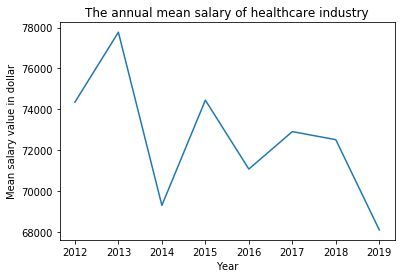


The median salary of the healthcare industry is 70575.0



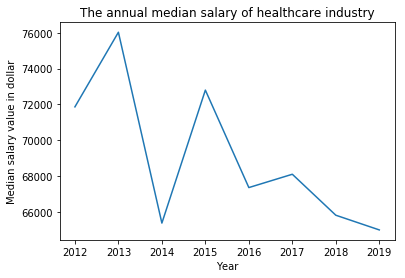


Mean minus Median plot


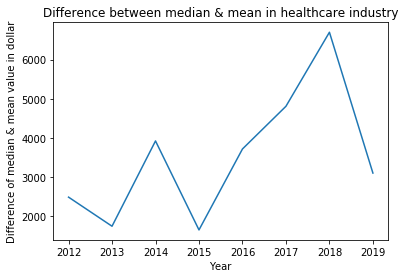

In [10]:
# The following analysis gets rid of companies having too few reference levels, or too many reference levels
if not company_analyzed:
    new_healthcare_df = None
    for company in company_year_dict:
        if (len(company_year_dict[company]) > min_level_counts) and (len(company_year_dict[company]) < max_level_counts):
            new_healthcare_df = merge_dataframe(new_healthcare_df, healthcare_df[healthcare_df['KF_ID'] == company])

    print("Of companies over " + str(min_surveying_years) + " years of survey\n")
    print("A total of " + str(new_healthcare_df.shape[0]) + " data pieces are related with healthcare industry\n")

    # Mean
    healthcare_mean_salary = new_healthcare_df['Base Salary'].mean()
    print("The mean salary of the healthcare industry is " + str(healthcare_mean_salary) + "\n")

    annual_mean = []
    for year in range(2008, 2020):
        year_healthcare_df = new_healthcare_df[new_healthcare_df['CalendarYear'] == year]
        annual_mean_salary = year_healthcare_df['Base Salary'].mean()
        annual_mean.append(annual_mean_salary)

    fig1 = plt.figure()
    plt.title("The annual mean salary of healthcare industry")
    plt.ylabel("Mean salary value in dollar")
    plt.xlabel("Year")
    plt.plot(range(2008, 2020), annual_mean)
    plt.show()

    # Median
    healthcare_median_salary = new_healthcare_df['Base Salary'].median()
    print("\nThe median salary of the healthcare industry is " + str(healthcare_median_salary) + "\n")

    annual_median = []
    for year in range(2008, 2020):
        year_healthcare_df = new_healthcare_df[new_healthcare_df['CalendarYear'] == year]
        annual_median_salary = year_healthcare_df['Base Salary'].median()
        annual_median.append(annual_median_salary)

    fig2 = plt.figure()
    plt.title("The annual median salary of healthcare industry")
    plt.ylabel("Median salary value in dollar")
    plt.xlabel("Year")
    plt.plot(range(2008, 2020), annual_median)
    plt.show()

    print("\nMean minus Median plot")
    fig3 = plt.figure()
    plt.title("Difference between median & mean in healthcare industry")
    plt.ylabel("Difference of median & mean value in dollar")
    plt.xlabel("Year")
    plt.plot(range(2008, 2020), np.array(annual_mean) - np.array(annual_median))
    plt.show()

### Results comparison between raw & processed:

Not much difference found in year 2012-2016, but the mean & median value changes evidently in 2017-2019. 

We can conclude that many conpanies only participating into the survey in year 2017-2019, influencing the quality of data.

Similar to changes from the improvements of deleting companies of 1-2 years of enrollment.

### 5. Relevance analysis among variables

In [11]:
# Only counting ReferenceLevelNum and IncumbentPointCount into regression
var_df = healthcare_df[['ReferenceLevelNum', 'IncumbentPointCount']]
salary_df = healthcare_df['Base Salary']

train_var, test_var, train_salary, test_salary = train_test_split(var_df, salary_df, test_size = 0.2)
linear_reg = LinearRegression()
linear_reg.fit(train_var, train_salary)
pred_salary = linear_reg.predict(test_var)

print("The coeficients of linear regression are " + str(linear_reg.coef_))
print("The intercept of linear regresssion is " + str(linear_reg.intercept_) + "\n")
print("The R2 score: ")
print("%.3f\n" % (r2_score(test_salary, pred_salary)))
print("The RMSE error of regression model is %.3f" % (np.sqrt(mean_squared_error(test_salary, pred_salary))))

The coeficients of linear regression are [820.64874562 156.69533078]
The intercept of linear regresssion is 5949.947027654707

The R2 score: 
0.523

The RMSE error of regression model is 22464.451


In [12]:
# Counting ReferenceLevelNum, IncumbentPointCount, Num into regression
var_df = healthcare_df[['ReferenceLevelNum', 'IncumbentPointCount', 'NumOfEmpDesc', 'Base Salary']].dropna()
salary_df = var_df['Base Salary']
var_df = var_df[['ReferenceLevelNum', 'IncumbentPointCount', 'NumOfEmpDesc']]

train_var, test_var, train_salary, test_salary = train_test_split(var_df, salary_df, test_size = 0.2)
linear_reg = LinearRegression()
linear_reg.fit(train_var, train_salary)
pred_salary = linear_reg.predict(test_var)

print("The coeficients of linear regression are " + str(linear_reg.coef_))
print("The intercept of linear regresssion is " + str(linear_reg.intercept_) + "\n")
print("The R2 score: ")
print("%.3f\n" % (r2_score(test_salary, pred_salary)))
print("The RMSE error of regression model is %.3f" % (np.sqrt(mean_squared_error(test_salary, pred_salary))))

The coeficients of linear regression are [ 1552.60217016   147.17410646 -2527.52021855]
The intercept of linear regresssion is 15425.523342445224

The R2 score: 
0.528

The RMSE error of regression model is 21710.947


### Results comparison befroe & after NumOfEmpDesc added to regression:

The R2 score and RMSE error do not improve very much after the factor of Number of employees added. We can conclude that NumOfEmpDesc is not primary factor affecting Base Salary.

## Reference Level Analysis 

### 1. Raw analysis of all levels in healthcare sector


Distribution across reference levels



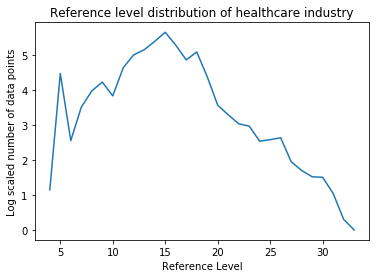


Mean value of salary across reference levels



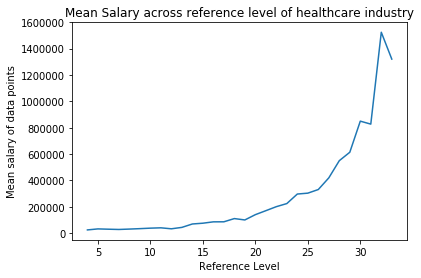


Median values across reference levels



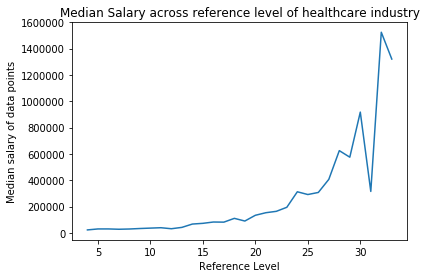

In [13]:
if not reference_level_analyzed:
    level_count = defaultdict(int)
    level_mean = defaultdict(float)
    level_median = defaultdict(float)
    for level in sorted(pd.unique(healthcare_df['ReferenceLevelNum'])):
        level_healthcare_df = healthcare_df[healthcare_df['ReferenceLevelNum'] == level]
        level_count[int(level)] = np.log10(level_healthcare_df.shape[0])
        level_mean[int(level)] = level_healthcare_df['Base Salary'].dropna().mean()
        level_median[int(level)] = level_healthcare_df['Base Salary'].dropna().median()

    print("\nDistribution across reference levels\n")
    fig1 = plt.figure()
    plt.title("Reference level distribution of healthcare industry")
    plt.ylabel("Log scaled number of data points")
    plt.xlabel("Reference Level")
    plt.plot(sorted(pd.unique(healthcare_df['ReferenceLevelNum'])), list(level_count.values()))
    plt.show()

    print("\nMean value of salary across reference levels\n")
    fig2 = plt.figure()
    plt.title("Mean Salary across reference level of healthcare industry")
    plt.ylabel("Mean salary of data points")
    plt.xlabel("Reference Level")
    plt.plot(sorted(pd.unique(healthcare_df['ReferenceLevelNum'])), list(level_mean.values()))
    plt.show()

    print("\nMedian values across reference levels\n")
    fig3 = plt.figure()
    plt.title("Median Salary across reference level of healthcare industry")
    plt.ylabel("Median salary of data points")
    plt.xlabel("Reference Level")
    plt.plot(sorted(pd.unique(healthcare_df['ReferenceLevelNum'])), list(level_median.values()))
    plt.show()
        

### Results from reference level analysis:

The data points with level greater than 33 is not accurate. Level 99 is not applicable, so delete this level in all analysis in this notebook.

### 2. Yearly analysis on reference level of healthcare industry


Distribution across reference levels



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


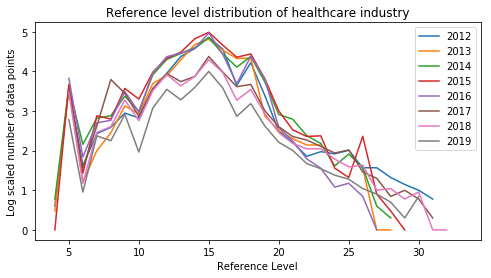


Mean value of salary across reference levels



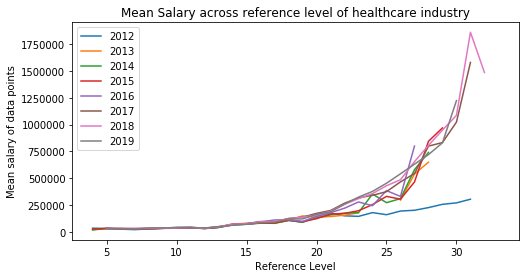


Median values across reference levels



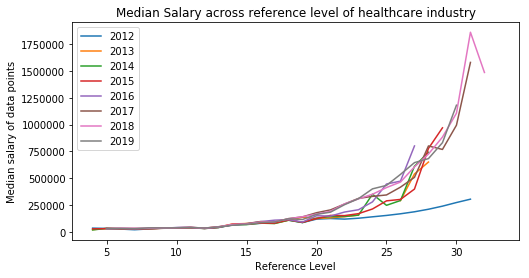

In [14]:
if not reference_level_analyzed:
    print("\nDistribution across reference levels\n")
    fig1 = plt.figure(figsize=(8,4))
    plt.title("Reference level distribution of healthcare industry")
    plt.ylabel("Log scaled number of data points")
    plt.xlabel("Reference Level")
    for year in range(2012, 2020):
        year_healthcare_df = healthcare_df[healthcare_df['CalendarYear'] == year]
        year_level_count = defaultdict(lambda: defaultdict(int))
        for level in sorted(pd.unique(healthcare_df['ReferenceLevelNum'])):
            level_healthcare_df = year_healthcare_df[year_healthcare_df['ReferenceLevelNum'] == level]
            year_level_count[int(level)] = np.log10(level_healthcare_df.shape[0])
        plt.plot(sorted(pd.unique(healthcare_df['ReferenceLevelNum'])), list(year_level_count.values()), label = str(year))
    plt.legend()
    plt.show()

    print("\nMean value of salary across reference levels\n")
    fig2 = plt.figure(figsize=(8,4))
    plt.title("Mean Salary across reference level of healthcare industry")
    plt.ylabel("Mean salary of data points")
    plt.xlabel("Reference Level")
    for year in range(2012, 2020):
        year_healthcare_df = healthcare_df[healthcare_df['CalendarYear'] == year]
        year_level_mean = defaultdict(lambda: defaultdict(float))
        for level in sorted(pd.unique(healthcare_df['ReferenceLevelNum'])):
            level_healthcare_df = year_healthcare_df[year_healthcare_df['ReferenceLevelNum'] == level]
            year_level_mean[int(level)] = level_healthcare_df['Base Salary'].dropna().mean()
        plt.plot(sorted(pd.unique(healthcare_df['ReferenceLevelNum'])), list(year_level_mean.values()), label = str(year))
    plt.legend()
    plt.show()

    print("\nMedian values across reference levels\n")
    fig3 = plt.figure(figsize=(8,4))
    plt.title("Median Salary across reference level of healthcare industry")
    plt.ylabel("Median salary of data points")
    plt.xlabel("Reference Level")
    for year in range(2012, 2020):
        year_healthcare_df = healthcare_df[healthcare_df['CalendarYear'] == year]
        year_level_median = defaultdict(lambda: defaultdict(float))
        for level in sorted(pd.unique(healthcare_df['ReferenceLevelNum'])):
            level_healthcare_df = year_healthcare_df[year_healthcare_df['ReferenceLevelNum'] == level]
            year_level_median[int(level)] = level_healthcare_df['Base Salary'].dropna().median()
        plt.plot(sorted(pd.unique(healthcare_df['ReferenceLevelNum'])), list(year_level_median.values()), label = str(year))
    plt.legend()
    plt.show()

    

### Results from yearly reference level analysis:

From the year 2017, the mean & median values of level 10-25 falls greatly, which explains the downgoing values in the previous plot of company-year relationship

Data in year 2012 might contain some errors, since the mean & median salary of high reference level is comparably lower than those in other years.

### 3. Regression analysis on reference level of healthcare industry

In [15]:
if not reference_level_analyzed:
    # Linear regression on reference level and salary
    var_df = healthcare_df[['ReferenceLevelNum']]
    salary_df = healthcare_df['Base Salary']

    train_var, test_var, train_salary, test_salary = train_test_split(var_df, salary_df, test_size = 0.2)
    linear_reg = LinearRegression()
    linear_reg.fit(train_var, train_salary)
    pred_salary = linear_reg.predict(test_var)

    print("The coeficients of linear regression are " + str(linear_reg.coef_))
    print("The intercept of linear regresssion is " + str(linear_reg.intercept_) + "\n")
    print("The R2 score: ")
    print("%.3f\n" % (r2_score(test_salary, pred_salary)))
    print("The RMSE error of regression model is %.3f" % (np.sqrt(mean_squared_error(test_salary, pred_salary))))


The coeficients of linear regression are [8570.4436569]
The intercept of linear regresssion is -53016.28080445908

The R2 score: 
0.427

The RMSE error of regression model is 24617.241


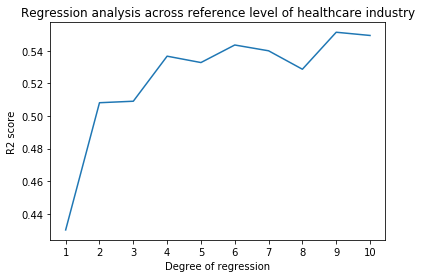

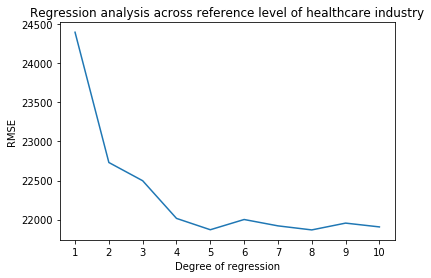

In [16]:
if not reference_level_analyzed:
    # Polynomial regression on reference level
    r2_scores = []
    RMSEs = []
    min_deg = 1
    max_deg = 10
    for degree in range(min_deg, max_deg+1):
        var_df = healthcare_df[['ReferenceLevelNum']]
        salary_df = healthcare_df['Base Salary']

        train_var, test_var, train_salary, test_salary = train_test_split(var_df, salary_df, test_size = 0.2)
        linear_reg = LinearRegression()
        train_var = PolynomialFeatures(degree).fit_transform(train_var)
        test_var = PolynomialFeatures(degree).fit_transform(test_var)
        linear_reg.fit(train_var, train_salary)
        pred_salary = linear_reg.predict(test_var)

        r2_scores.append(r2_score(test_salary, pred_salary))
        RMSEs.append(np.sqrt(mean_squared_error(test_salary, pred_salary)))

    fig1 = plt.figure()
    plt.title("Regression analysis across reference level of healthcare industry")
    plt.ylabel("R2 score")
    plt.xlabel("Degree of regression")
    plt.xticks(range(min_deg, max_deg+1, 1))
    plt.plot(range(min_deg, max_deg+1), r2_scores)
    plt.show()

    fig2 = plt.figure()
    plt.title("Regression analysis across reference level of healthcare industry")
    plt.ylabel("RMSE")
    plt.xlabel("Degree of regression")
    plt.xticks(range(min_deg, max_deg+1, 1))
    plt.plot(range(min_deg, max_deg+1), RMSEs)
    plt.show()

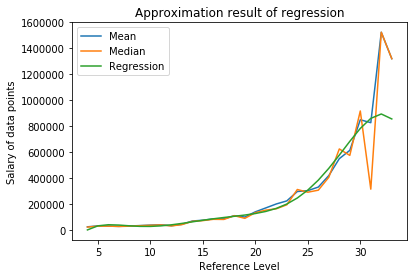

In [17]:
if not reference_level_analyzed:
    level_mean = defaultdict(float)
    level_median = defaultdict(float)
    for level in sorted(pd.unique(healthcare_df['ReferenceLevelNum'])):
        level_healthcare_df = healthcare_df[healthcare_df['ReferenceLevelNum'] == level]
        level_mean[int(level)] = level_healthcare_df['Base Salary'].dropna().mean()
        level_median[int(level)] = level_healthcare_df['Base Salary'].dropna().median()

    var_df = healthcare_df[['ReferenceLevelNum']]
    salary_df = healthcare_df['Base Salary']

    linear_reg = LinearRegression()
    var_df = PolynomialFeatures(6).fit_transform(var_df)
    linear_reg.fit(var_df, salary_df)
    pred_result = []
    for level in sorted(pd.unique(healthcare_df['ReferenceLevelNum'])):
        pred = [[level]]
        pred = PolynomialFeatures(6).fit_transform(pred)
        pred_result.append(linear_reg.predict(pred))
    
    fig1 = plt.figure()
    plt.title("Approximation result of regression")
    plt.ylabel("Salary of data points")
    plt.xlabel("Reference Level")
    plt.plot(sorted(pd.unique(healthcare_df['ReferenceLevelNum'])), list(level_mean.values()), label = "Mean")
    plt.plot(sorted(pd.unique(healthcare_df['ReferenceLevelNum'])), list(level_median.values()), label = "Median")
    plt.plot(sorted(pd.unique(healthcare_df['ReferenceLevelNum'])), pred_result, label = "Regression")
    plt.legend()
    plt.show()

### Results from regression analysis:

The linear regression model is not complex enough to generalize the salary trend based on reference level.

Considering the balance between model complexity and running time, the polynomial model with degree 5 or 6 could best describe the trend between reference level and base salary.

The regression could predict the salary of low & medium reference level very well, but for high level incomes,  the model is biased in prediction since the datapoints of high incomer is too few to make good predictions.

## Incumbent Point Analysis 

### 1. Raw analysis of all levels in healthcare sector



Distribution across incumbent points



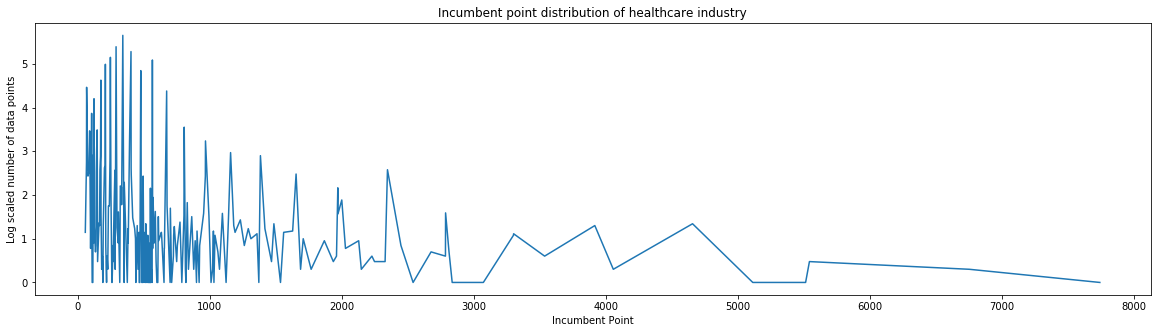


Mean value of salary across incumbent points



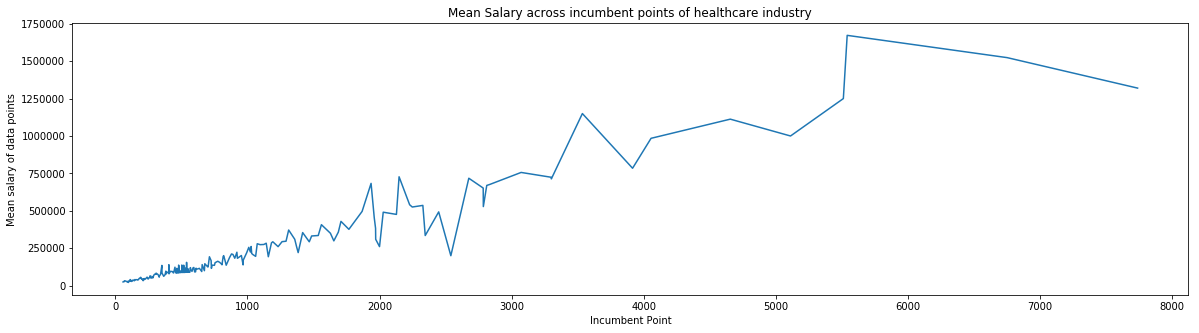


Median values across incumbent points



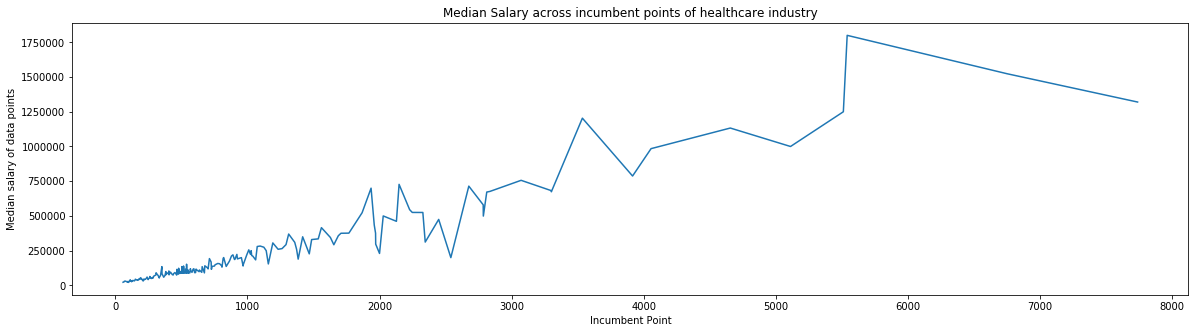

In [18]:
if not incumbent_point_analyzed:
    level_count = defaultdict(int)
    level_mean = defaultdict(float)
    level_median = defaultdict(float)
    for level in sorted(pd.unique(healthcare_df['IncumbentPointCount'])):
        level_healthcare_df = healthcare_df[healthcare_df['IncumbentPointCount'] == level]
        level_count[int(level)] = np.log10(level_healthcare_df.shape[0])
        level_mean[int(level)] = level_healthcare_df['Base Salary'].dropna().mean()
        level_median[int(level)] = level_healthcare_df['Base Salary'].dropna().median()

    print("\nDistribution across incumbent points\n")
    fig1 = plt.figure(figsize=(20,5))
    plt.title("Incumbent point distribution of healthcare industry")
    plt.ylabel("Log scaled number of data points")
    plt.xlabel("Incumbent Point")
    plt.plot(sorted(pd.unique(healthcare_df['IncumbentPointCount'])), list(level_count.values()))
    plt.show()

    print("\nMean value of salary across incumbent points\n")
    fig2 = plt.figure(figsize=(20,5))
    plt.title("Mean Salary across incumbent points of healthcare industry")
    plt.ylabel("Mean salary of data points")
    plt.xlabel("Incumbent Point")
    plt.plot(sorted(pd.unique(healthcare_df['IncumbentPointCount'])), list(level_mean.values()))
    plt.show()

    print("\nMedian values across incumbent points\n")
    fig3 = plt.figure(figsize=(20,5))
    plt.title("Median Salary across incumbent points of healthcare industry")
    plt.ylabel("Median salary of data points")
    plt.xlabel("Incumbent Point")
    plt.plot(sorted(pd.unique(healthcare_df['IncumbentPointCount'])), list(level_median.values()))
    plt.show()

### Results from incumbent points analysis:

Similar to the conclusion in reference level, the incumbent point greater than 8000 is not accurate

### 2. Yearly analysis on incumbent points of healthcare industry


Distribution across incumbent points



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


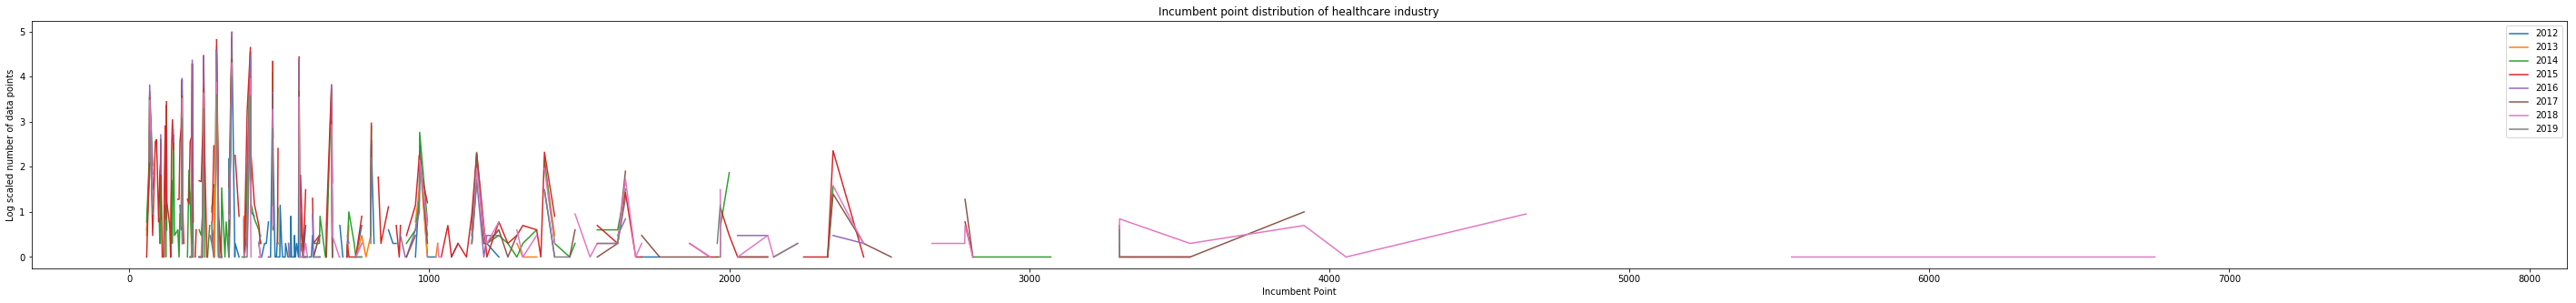


Mean value of salary across incumbent points



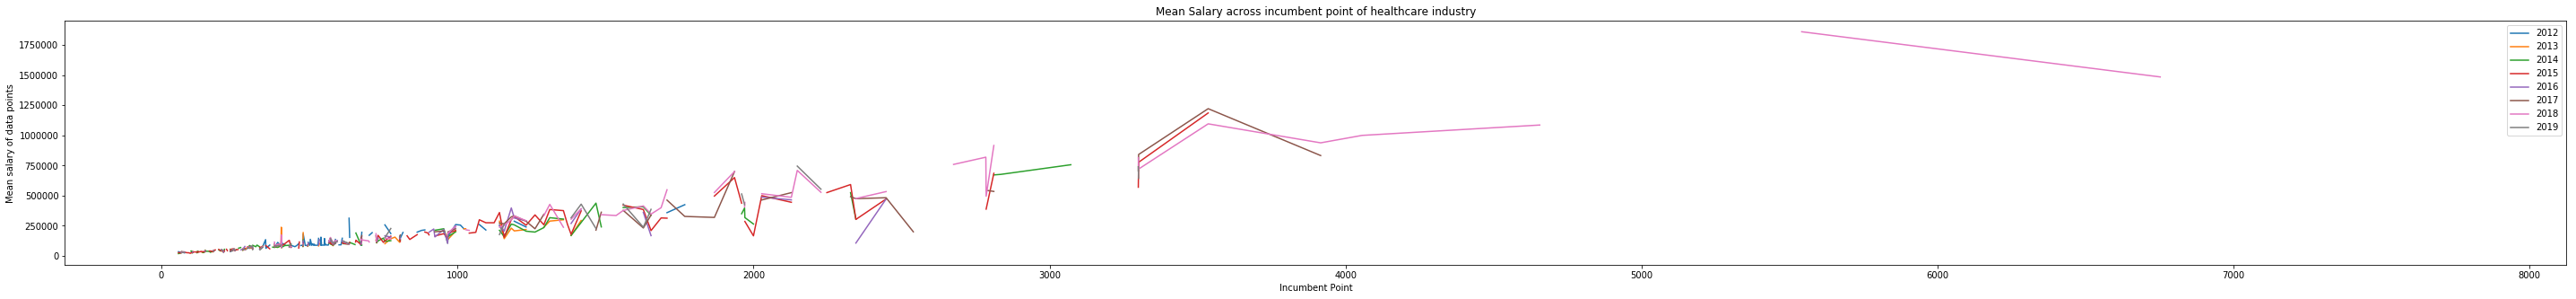


Median values across incumbent points



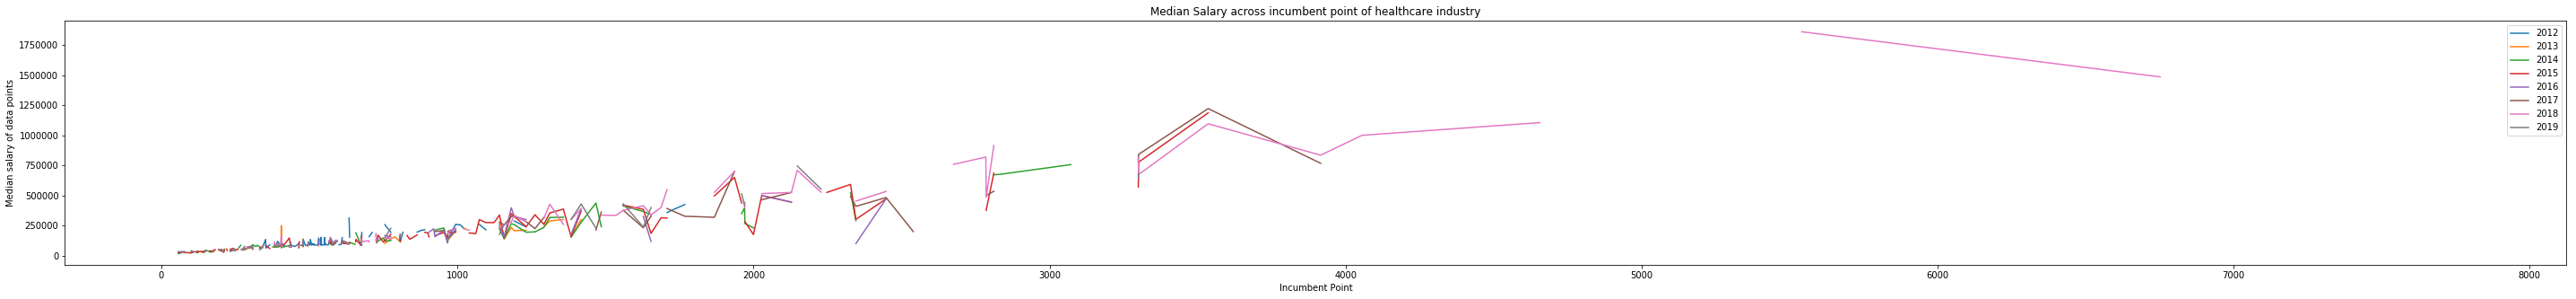

In [19]:
if not incumbent_point_analyzed:
    print("\nDistribution across incumbent points\n")
    fig1 = plt.figure(figsize=(50,5))
    plt.title("Incumbent point distribution of healthcare industry")
    plt.ylabel("Log scaled number of data points")
    plt.xlabel("Incumbent Point")
    for year in range(2012, 2020):
        year_healthcare_df = healthcare_df[healthcare_df['CalendarYear'] == year]
        year_level_count = defaultdict(lambda: defaultdict(int))
        for level in sorted(pd.unique(healthcare_df['IncumbentPointCount'])):
            level_healthcare_df = year_healthcare_df[year_healthcare_df['IncumbentPointCount'] == level]
            year_level_count[int(level)] = np.log10(level_healthcare_df.shape[0])
        plt.plot(sorted(pd.unique(healthcare_df['IncumbentPointCount'])), list(year_level_count.values()), label = str(year))
    plt.legend()
    plt.show()

    print("\nMean value of salary across incumbent points\n")
    fig2 = plt.figure(figsize=(50,5))
    plt.title("Mean Salary across incumbent point of healthcare industry")
    plt.ylabel("Mean salary of data points")
    plt.xlabel("Incumbent Point")
    for year in range(2012, 2020):
        year_healthcare_df = healthcare_df[healthcare_df['CalendarYear'] == year]
        year_level_mean = defaultdict(lambda: defaultdict(float))
        for level in sorted(pd.unique(healthcare_df['IncumbentPointCount'])):
            level_healthcare_df = year_healthcare_df[year_healthcare_df['IncumbentPointCount'] == level]
            year_level_mean[int(level)] = level_healthcare_df['Base Salary'].dropna().mean()
        plt.plot(sorted(pd.unique(healthcare_df['IncumbentPointCount'])), list(year_level_mean.values()), label = str(year))
    plt.legend()
    plt.show()

    print("\nMedian values across incumbent points\n")
    fig3 = plt.figure(figsize=(50,5))
    plt.title("Median Salary across incumbent point of healthcare industry")
    plt.ylabel("Median salary of data points")
    plt.xlabel("Incumbent Point")
    for year in range(2012, 2020):
        year_healthcare_df = healthcare_df[healthcare_df['CalendarYear'] == year]
        year_level_median = defaultdict(lambda: defaultdict(float))
        for level in sorted(pd.unique(healthcare_df['IncumbentPointCount'])):
            level_healthcare_df = year_healthcare_df[year_healthcare_df['IncumbentPointCount'] == level]
            year_level_median[int(level)] = level_healthcare_df['Base Salary'].dropna().median()
        plt.plot(sorted(pd.unique(healthcare_df['IncumbentPointCount'])), list(year_level_median.values()), label = str(year))
    plt.legend()
    plt.show()

### Results from yearly incumbent points analysis:

The incubent point is too detailed, causing too few data points covered in one incumbent value. This is not suitable for yearly analysis.

### 3. Regression analysis on incumbent points of healthcare industry

In [20]:
if not incumbent_point_analyzed:
    # Linear regression on reference level and salary
    var_df = healthcare_df[['IncumbentPointCount']]
    salary_df = healthcare_df['Base Salary']

    train_var, test_var, train_salary, test_salary = train_test_split(var_df, salary_df, test_size = 0.2)
    linear_reg = LinearRegression()
    linear_reg.fit(train_var, train_salary)
    pred_salary = linear_reg.predict(test_var)

    print("The coeficients of linear regression are " + str(linear_reg.coef_))
    print("The intercept of linear regresssion is " + str(linear_reg.intercept_) + "\n")
    print("The R2 score: ")
    print("%.3f\n" % (r2_score(test_salary, pred_salary)))
    print("The RMSE error of regression model is %.3f" % (np.sqrt(mean_squared_error(test_salary, pred_salary))))


The coeficients of linear regression are [169.65317795]
The intercept of linear regresssion is 13433.47778614048

The R2 score: 
0.528

The RMSE error of regression model is 22449.679


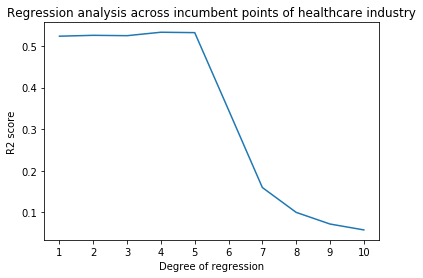

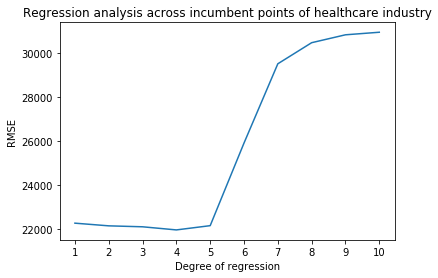

In [21]:
if not incumbent_point_analyzed:
    # Polynomial regression on reference level
    r2_scores = []
    RMSEs = []
    min_deg = 1
    max_deg = 10
    for degree in range(min_deg, max_deg+1):
        var_df = healthcare_df[['IncumbentPointCount']]
        salary_df = healthcare_df['Base Salary']

        train_var, test_var, train_salary, test_salary = train_test_split(var_df, salary_df, test_size = 0.2)
        linear_reg = LinearRegression()
        train_var = PolynomialFeatures(degree).fit_transform(train_var)
        test_var = PolynomialFeatures(degree).fit_transform(test_var)
        linear_reg.fit(train_var, train_salary)
        pred_salary = linear_reg.predict(test_var)

        r2_scores.append(r2_score(test_salary, pred_salary))
        RMSEs.append(np.sqrt(mean_squared_error(test_salary, pred_salary)))

    fig1 = plt.figure()
    plt.title("Regression analysis across incumbent points of healthcare industry")
    plt.ylabel("R2 score")
    plt.xlabel("Degree of regression")
    plt.xticks(range(min_deg, max_deg+1, 1))
    plt.plot(range(min_deg, max_deg+1), r2_scores)
    plt.show()

    fig2 = plt.figure()
    plt.title("Regression analysis across incumbent points of healthcare industry")
    plt.ylabel("RMSE")
    plt.xlabel("Degree of regression")
    plt.xticks(range(min_deg, max_deg+1, 1))
    plt.plot(range(min_deg, max_deg+1), RMSEs)
    plt.show()

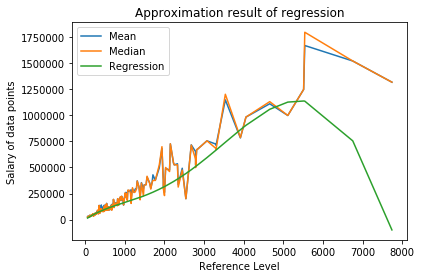

In [22]:
if not incumbent_point_analyzed:
    level_mean = defaultdict(float)
    level_median = defaultdict(float)
    for level in sorted(pd.unique(healthcare_df['IncumbentPointCount'])):
        level_healthcare_df = healthcare_df[healthcare_df['IncumbentPointCount'] == level]
        level_mean[int(level)] = level_healthcare_df['Base Salary'].dropna().mean()
        level_median[int(level)] = level_healthcare_df['Base Salary'].dropna().median()

    var_df = healthcare_df[['IncumbentPointCount']]
    salary_df = healthcare_df['Base Salary']

    linear_reg = LinearRegression()
    var_df = PolynomialFeatures(5).fit_transform(var_df)
    linear_reg.fit(var_df, salary_df)
    pred_result = []
    for level in sorted(pd.unique(healthcare_df['IncumbentPointCount'])):
        pred = [[level]]
        pred = PolynomialFeatures(5).fit_transform(pred)
        pred_result.append(linear_reg.predict(pred))
    
    fig1 = plt.figure()
    plt.title("Approximation result of regression")
    plt.ylabel("Salary of data points")
    plt.xlabel("Incumbent Points")
    plt.plot(sorted(pd.unique(healthcare_df['IncumbentPointCount'])), list(level_mean.values()), label = "Mean")
    plt.plot(sorted(pd.unique(healthcare_df['IncumbentPointCount'])), list(level_median.values()), label = "Median")
    plt.plot(sorted(pd.unique(healthcare_df['IncumbentPointCount'])), pred_result, label = "Regression")
    plt.legend()
    plt.show()

### Results from regression analysis:

The linear regression model is not complex enough to generalize the salary trend based on incumbent points.

Considering the balance between model complexity and running time, the polynomial model with degree 5 could best describe the trend between reference level and base salary. 

If the model degree is higher than 6, then the model will produce a much more unreliable result due to high model complexity & uneven distribution of datapoints.

The regression could predict the salary of low & medium incumbent points very well. Similar to the problems in reference level, the model fails to predict high incumbent level incomes since datapoints of those high level incomers are too rare.

## Total Regression Analysis 

### 1. Multinomial Regression of all variables

In [23]:
var_df = healthcare_df[['ReferenceLevelNum', 'IncumbentPointCount']]
salary_df = healthcare_df['Base Salary']

train_var, test_var, train_salary, test_salary = train_test_split(var_df, salary_df, test_size = 0.2)
linear_reg = LinearRegression()
train_var = PolynomialFeatures(5).fit_transform(train_var)
test_var = PolynomialFeatures(5).fit_transform(test_var)
linear_reg.fit(train_var, train_salary)
pred_salary = linear_reg.predict(test_var)

r2_scores.append(r2_score(test_salary, pred_salary))
RMSEs.append(np.sqrt(mean_squared_error(test_salary, pred_salary)))

print("The coeficients of linear regression are " + str(linear_reg.coef_))
print("The intercept of linear regresssion is " + str(linear_reg.intercept_) + "\n")
print("The R2 score: ")
print("%.3f\n" % (r2_score(test_salary, pred_salary)))
print("The RMSE error of regression model is %.3f" % (np.sqrt(mean_squared_error(test_salary, pred_salary))))

The coeficients of linear regression are [ 0.00000000e+00  7.73243947e-01 -1.78894638e+00 -2.46049164e+00
 -1.65392670e+01 -1.03342069e-01 -8.57316513e+00 -5.31543153e+01
  2.32451569e+00 -2.17948693e-02  4.92159790e+01  1.82562792e+00
 -1.47990611e-01  1.68435876e-03 -1.35256315e-06 -2.01620959e+00
  1.86431333e-02  2.03290557e-03 -3.01886138e-05  4.48876354e-08
 -1.44445038e-11]
The intercept of linear regresssion is 58495.91377912073

The R2 score: 
0.554

The RMSE error of regression model is 21562.254


### Results from polynomial regression analysis:

The multinomial regression model does not effectively improve the performance compared to linear model.

### 2. Regresssion with Supportive Vector of all variables

In [ ]:
sv_regression = SVR(kernel='linear', degree = 1, max_iter = 100000)

var_df = healthcare_df[['ReferenceLevelNum', 'IncumbentPointCount']]
salary_df = healthcare_df['Base Salary']

train_var, test_var, train_salary, test_salary = train_test_split(var_df, salary_df, test_size = 0.2)
sv_regression.fit(train_var, train_salary)
pred_salary = sv_regression.predict(test_var)

print("The coeficients of linear regression are " + str(linear_reg.coef_))
print("The intercept of linear regresssion is " + str(linear_reg.intercept_) + "\n")
print("The R2 score: ")
print("%.3f\n" % (r2_score(test_salary, pred_salary)))
print("The RMSE error of regression model is %.3f" % (np.sqrt(mean_squared_error(test_salary, pred_salary))))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


### Results from Supportive Vector regression analysis:

The SV-regression is very slow in running, and it often fails to converge to a small tolerance limit. And the model performance is worse than traditional regression. 

Maybe this kind of regression could have better performance, but it may need searching on better hyper-parameters for good results on regression.